# Analisis preliminar del conjunto de datos

In [1]:
#Importaciones
import pandas as pd
import numpy as np

#Para llamar a archivos de otras carpetas
import sys
sys.path.append('..')

#importar la función reduce para pode rusarla
from functools import reduce

#Visualizar todas las columnas
pd.set_option('display.max_columns', None)


In [ ]:
#Después importamos el archivo de funciones ('sp_limpieza.py') 
import src.sp_limpieza as sp
#Importamos importlib para poder recargar el módulo y reflejar los cambios actualizados
import importlib  
importlib.reload(sp) 

<module 'src.sp_limpieza' from 'c:\\Users\\pooo_\\Desktop\\Hackio\\proyecto_final_troncal\\analisis_eda_proyecto_final\\jupyters\\..\\src\\sp_limpieza.py'>

In [3]:
#Para interactuar con el sistema operativo
import os
#Devuelve la ruta del directorio actual
print(os.getcwd())

c:\Users\pooo_\Desktop\Hackio\proyecto_final_troncal\analisis_eda_proyecto_final\jupyters


In [4]:
#Librerías visualización de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Transformación y limpieza de datos

### 1.1. Importación de los datos

In [5]:
#Leer los archivos
df_attendance = pd.read_csv("../data/data_raw/attendance.csv", index_col = 0)
df_homework = pd.read_csv("../data/data_raw/homework.csv", index_col = 0)
df_performance = pd.read_csv("../data/data_raw/performance.csv", index_col = 0)
df_students = pd.read_csv("../data/data_raw/students.csv", index_col = 0)
df_communication = pd.read_csv("../data/data_raw/communication.csv", index_col = 0)

### 1.2. Limpieza y transformación de los datos


In [6]:
#Ver dataframe 'df_attendace'
df_att_preliminar =  sp.eda_preliminar(df_attendance)

,Date,Subject,Attendance_Status
Student_ID,,,
S08132,2024-10-20,Science,left early
S10310,2025-02-14,English,left early
S02150,2024-05-16,Arabic,Present
S11278,2024-04-07,Math,late
S09835,2025-01-01,History,left early


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 364680 entries, S06592 to S12134
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date               364680 non-null  object
 1   Subject            364680 non-null  object
 2   Attendance_Status  364680 non-null  object
dtypes: object(3)
memory usage: 11.1+ MB


None

____________________________
NULOS


Date                 0.0
Subject              0.0
Attendance_Status    0.0
dtype: float64

____________________________
DUPLICADOS


np.int64(347112)

____________________________
DESCRIBE


,count,unique,top,freq
Date,364680,366,2024-12-31,1075
Subject,364680,6,Math,61241
Attendance_Status,364680,8,PRESENT,45982


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Date,364680,366,2024-12-31,1075
Subject,364680,6,Math,61241
Attendance_Status,364680,8,PRESENT,45982


____________________________
VALUE COUNTS
Date
2024-12-31    1075
2024-05-05    1073
2024-09-06    1070
2024-08-06    1068
2024-09-22    1068
              ... 
2024-12-25     922
2024-05-09     921
2024-03-31     919
2024-12-07     917
2024-04-21     905
Name: count, Length: 366, dtype: int64
Subject
Math         61241
Science      60881
Arabic       60749
English      60684
Geography    60640
History      60485
Name: count, dtype: int64
Attendance_Status
PRESENT       45982
Absent        45751
Present       45632
Late          45509
 late         45508
absnt         45478
left early    45435
excused       45385
Name: count, dtype: int64
____________________________


In [7]:
#Quitar los espacios y pasar a misnuculas las tabla
df_attendance = sp.valores_a_minus(df_attendance)
df_attendance.sample(10)

,date,subject,attendance_status
student_id,,,
s11507,2025-03-04,english,late
s03952,2024-11-15,english,present
s02135,2024-10-03,arabic,present
s06807,2024-07-30,english,excused
s02442,2024-06-15,arabic,excused
s03033,2024-11-04,arabic,late
s09221,2024-07-27,english,excused
s07693,2024-09-15,geography,absnt
s10493,2024-04-26,science,late


In [8]:
#Ver en la columna attendance_status que valores tiene.
conteo = df_attendance['attendance_status'].value_counts()
conteo

attendance_status
present       91614
late          91017
absent        45751
absnt         45478
left early    45435
excused       45385
Name: count, dtype: int64

In [9]:
#Corregimos el valor 'absnt' por 'absent' y comprobamos los resultados de la columna
df_attendance['attendance_status'] = df_attendance['attendance_status'].replace('absnt','absent')

conteo = df_attendance['attendance_status'].value_counts()
conteo
#Ya tenemos los valores de esta columna corregidos.

attendance_status
present       91614
absent        91229
late          91017
left early    45435
excused       45385
Name: count, dtype: int64

In [10]:
#Cambiar nombre de columna 'date' para hacerla mas descriptiva y 'attendace_status' para hacerla mas corta.
df_attendance.rename(columns={'date':'att_date', 'attendance_status':'att_status'}, inplace= True)

In [11]:
# Como la columna 'date' es de tipo 'Object' vamos a pasarla a tipo Datetime y comprobamos el tipo de dato que sea correct
df_attendance = sp.convertir_columna_a_fecha(df_attendance, 'att_date')
df_attendance.sample(10)

Columna 'att_date' convertida a datetime con formato %Y-%m-%d.


,att_date,subject,att_status
student_id,,,
s09151,2025-02-08,science,present
s08911,2024-11-26,history,late
s02134,2024-06-26,history,present
s03542,2024-08-31,arabic,late
s06885,2025-01-04,english,late
s04260,2024-04-13,arabic,excused
s03849,2024-10-18,geography,late
s09629,2024-03-09,arabic,absent
s07229,2024-05-07,geography,present


In [12]:
#Comprobación del tipo de dato de la columna
print(df_attendance['att_date'].dtype)

datetime64[ns]


In [13]:
#Comprobamos el resto de columnas que sean de tipo correcto.
print(df_attendance.dtypes)

att_date      datetime64[ns]
subject               object
att_status            object
dtype: object


In [14]:
#Ver dataframe 'df_homework'
df_hw_preliminar =  sp.eda_preliminar(df_homework)
df_hw_preliminar

,Subject,Assignment_Name,Due_Date,Status,Grade_Feedback,Guardian_Signature
Student_ID,,,,,,
S08276,Science,These partner star.,2025-01-15,✅,C,
S04135,Arabic,Able institution performance.,2024-12-20,pending,C-,No
S10384,Science,Very five.,2024-12-09,❌,A,
S02032,Math,About score yes deal.,2024-12-06,Done,B,Yes
S03843,History,Similar air series.,2024-11-15,✅,F,Yes


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 60780 entries, S12002 to S08589
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Subject             60780 non-null  object
 1   Assignment_Name     60780 non-null  object
 2   Due_Date            60780 non-null  object
 3   Status              60780 non-null  object
 4   Grade_Feedback      60780 non-null  object
 5   Guardian_Signature  60780 non-null  object
dtypes: object(6)
memory usage: 3.2+ MB


None

____________________________
NULOS


Subject               0.0
Assignment_Name       0.0
Due_Date              0.0
Status                0.0
Grade_Feedback        0.0
Guardian_Signature    0.0
dtype: float64

____________________________
DUPLICADOS


np.int64(0)

____________________________
DESCRIBE


,count,unique,top,freq
Subject,60780,6,English,10209
Assignment_Name,60780,56065,Also.,15
Due_Date,60780,366,2025-01-23,315
Status,60780,6,Done,10278
Grade_Feedback,60780,8,A+,7709
Guardian_Signature,60780,3,No,20372


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Subject,60780,6,English,10209
Assignment_Name,60780,56065,Also.,15
Due_Date,60780,366,2025-01-23,315
Status,60780,6,Done,10278
Grade_Feedback,60780,8,A+,7709
Guardian_Signature,60780,3,No,20372


____________________________
VALUE COUNTS
Subject
English      10209
Geography    10179
Science      10112
History      10110
Arabic       10106
Math         10064
Name: count, dtype: int64
Assignment_Name
Also.                      15
Term.                      15
Understand.                13
Not.                       13
Eye.                       12
                           ..
Effect job amount.          1
Study indicate fight.       1
Reach whose investment.     1
Suggest figure.             1
Involve determine.          1
Name: count, Length: 56065, dtype: int64
Due_Date
2025-01-23    315
2025-03-02    302
2024-11-06    301
2024-11-08    300
2024-12-25    299
             ... 
11/04/2024     52
10/13/2024     51
12/21/2024     50
11/22/2024     50
03/01/2025     46
Name: count, Length: 366, dtype: int64
Status
 Done       10278
not done    10234
❌           10151
✔           10090
pending     10014
✅           10013
Name: count, dtype: int64
Grade_Feedback
A+    7709
B-    7639

In [15]:
#Pasar dataframe a minusculas
df_homework = sp.valores_a_minus(df_homework)
df_homework.sample(10)

,subject,assignment_name,due_date,status,grade_feedback,guardian_signature
student_id,,,,,,
s10892,history,ten lose focus.,2024-12-30,✔,a,
s10607,arabic,leader reach.,2024-09-28,pending,b,yes
s07113,science,recently entire city course.,2024-11-04,not done,a,
s02560,arabic,two agency build.,2025-02-13,pending,b,yes
s04963,history,home eat successful.,2024-11-10,✔,b,no
s05037,science,begin it another.,2025-03-02,❌,f,no
s00953,science,computer television late.,2025-03-08,✅,b-,
s06002,science,your approach network.,11/12/2024,✔,a,
s02241,math,congress without.,2024-09-27,pending,b,


In [16]:
#La columna 'due_date' tiene valores de fecha con diferentes formatos.
# Hay que pasarlo a un formato y asignalo como de tipo datetime.

df_homework = sp.convertir_columna_a_fecha(df_homework, 'due_date')
df_homework.sample(10)

Columna 'due_date' convertida a datetime con formato %Y-%m-%d.


,subject,assignment_name,due_date,status,grade_feedback,guardian_signature
student_id,,,,,,
s05452,english,down value player amount.,2024-09-20,pending,a,yes
s09328,english,site animal.,NaT,✔,b-,
s00067,geography,fish.,2024-09-21,✅,b-,yes
s07693,geography,go half several.,NaT,❌,a,yes
s04248,geography,stock stop.,2024-12-13,✅,d,no
s08895,math,we walk build.,2024-09-17,done,a+,
s08081,history,all throw.,2024-09-28,✅,a,no
s09760,arabic,decade end.,2025-02-03,done,f,
s03050,geography,nearly challenge.,NaT,done,b,yes


In [17]:
#Comprobación del tipo de dato de la columna
print(df_homework['due_date'].dtype)

datetime64[ns]


In [18]:
#Sacar nulos de la columna 'due_date' mediante funcion de sp.limpieza.py
nulos = sp.nulos_num_porcentaje(df_homework)
print(nulos)

(subject                   0
assignment_name           0
due_date              12358
status                    0
grade_feedback            0
guardian_signature        0
dtype: int64, subject                0.00
assignment_name        0.00
due_date              20.33
status                 0.00
grade_feedback         0.00
guardian_signature     0.00
dtype: float64)


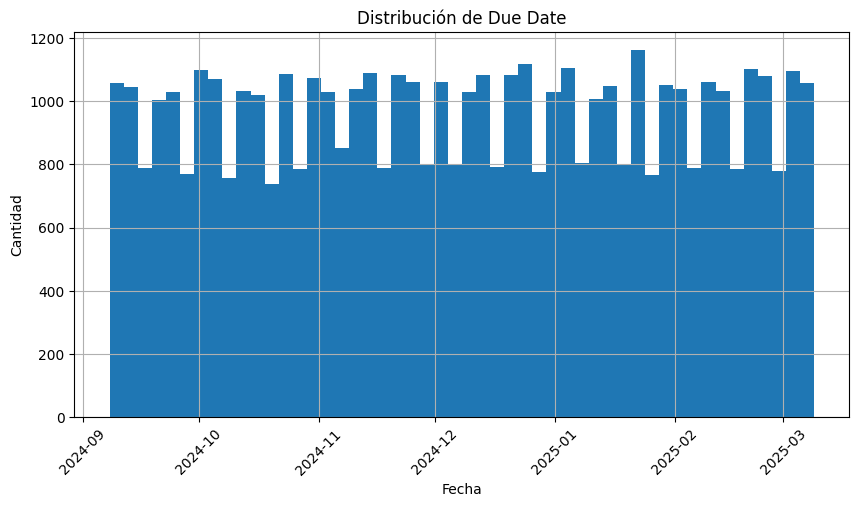

In [19]:
#🔴🔴 VALORAR SI ESTO MERECE O ME QUEDO SOLO CON LA CELDA DE ABAJO, QUE PONE --> describe().
# La columna 'due_date' tiene una cantidad elevada de nulos (20.33%) por lo que antes de imputarla comprobamos
#como es la distribución de sus valores para poder así valorar si imputar los nulos, si por media, moda o mediana.

df_homework['due_date'].hist(bins=50, figsize=(10,5))
plt.title('Distribución de Due Date')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


In [20]:
print(df_homework['due_date'].describe())

count                            48422
mean     2024-12-08 09:02:43.710710016
min                2024-09-08 00:00:00
25%                2024-10-24 00:00:00
50%                2024-12-09 00:00:00
75%                2025-01-23 00:00:00
max                2025-03-09 00:00:00
Name: due_date, dtype: object


In [21]:
#Dado que las fechas están bastante centradas en torno a finales de 2024, lo más razonable sería:
# Imputar con la mediana (50%), que es 2024-12-09, ya que la mediana es robusta frente a outliers y nos va a evitar 
# en caso de haber un par de fechas raras que el resultado no se distorsione demasiado.

mediana_fecha = df_homework['due_date'].median()
df_homework['due_date'].fillna(mediana_fecha, inplace= True)


C:\Users\pooo_\AppData\Local\Temp\ipykernel_1552\3655258861.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_homework['due_date'].fillna(mediana_fecha, inplace= True)


In [22]:
#Comprobamos que los nulos han desaparecido
nulos = sp.nulos_num_porcentaje(df_homework)
print(nulos)

(subject               0
assignment_name       0
due_date              0
status                0
grade_feedback        0
guardian_signature    0
dtype: int64, subject               0.0
assignment_name       0.0
due_date              0.0
status                0.0
grade_feedback        0.0
guardian_signature    0.0
dtype: float64)


In [23]:
#Para coregir la columna 'status' vamos a comprobar primero el tipo de valores que tiene.
status_valores = df_homework['status'].value_counts()
status_valores

status
done        10278
not done    10234
❌           10151
✔           10090
pending     10014
✅           10013
Name: count, dtype: int64

In [24]:
#Vamos a homogeinizar esos valores. 
mapeo_status = {
    '✅':'done',
    '❌':'not done',
    '✔':'done',
    'pending':'pending',
    'done':'done',
    'not done':'not done',
}

df_homework['status'] = df_homework['status'].replace(mapeo_status)

status_valores = df_homework['status'].value_counts()
status_valores


status
done        30381
not done    20385
pending     10014
Name: count, dtype: int64

In [25]:
#Debemos comprobar la columna 'guardian_signatura' ya que tiene campos vacíos que pandas
# lo detecta como cadena de texto vacía.
valores = df_homework['guardian_signature'].value_counts()
print(valores)

guardian_signature
no     20372
yes    20348
       20060
Name: count, dtype: int64


In [26]:
#Debemos de convertir la cadena vacia por nulos de numpy. Después vamos a comprobar cuantos nulos son.
df_homework['guardian_signature'] = df_homework['guardian_signature'].replace('', np.nan)
ver_nulos= sp.nulos_num_porcentaje(df_homework['guardian_signature'])
ver_nulos

(np.int64(20060), np.float64(33.0))

In [27]:
#Comprobamos la distribución (en porcentaje) de los 3 valores de la columna.
print(df_homework['guardian_signature'].value_counts(dropna=False, normalize=True)*100)

guardian_signature
no     33.517604
yes    33.478118
NaN    33.004278
Name: proportion, dtype: float64


In [28]:
#Hay un 33% de nulos de la columna 'guardian_signature' por tanto vamos a ver sus cuartiles, media etc.
print(df_homework['guardian_signature'].describe())

count     40720
unique        2
top          no
freq      20372
Name: guardian_signature, dtype: object


In [29]:
#Vamos a imputar los nulos con 'unknown' ya que así no modificamos artificialmente la proporción original y
# dejamos constancia de que falta esta información.

df_homework['guardian_signature'].fillna('unknown', inplace = True)

#Comprobamos la distribución (en porcentaje) de los 3 valores de la columna.
print(df_homework['guardian_signature'].value_counts())

guardian_signature
no         20372
yes        20348
unknown    20060
Name: count, dtype: int64


C:\Users\pooo_\AppData\Local\Temp\ipykernel_1552\2920811997.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_homework['guardian_signature'].fillna('unknown', inplace = True)


In [30]:
df_homework.sample(10)

,subject,assignment_name,due_date,status,grade_feedback,guardian_signature
student_id,,,,,,
s07335,math,they rule.,2025-03-04,not done,c,no
s01951,arabic,then garden.,2024-11-21,done,b-,unknown
s04873,history,agency because.,2024-12-25,done,a+,unknown
s05933,english,money heart.,2025-02-26,done,d,unknown
s06749,english,thousand price.,2024-09-24,done,f,yes
s05358,arabic,ago center sit.,2024-12-09,done,c-,yes
s02459,geography,father beat sing.,2024-12-08,done,b-,unknown
s02923,math,anyone poor.,2025-02-13,not done,b,unknown
s03034,english,chance level.,2024-12-02,not done,b,yes


In [31]:
#Ver dataframe 'df_communication'
df_comm_preliminar =  sp.eda_preliminar(df_communication)
df_comm_preliminar

,Date,Message_Type,Message_Content
Student_ID,,,
S05698,2024-11-01,Parent to Teacher,Senior area home hair specific seat art whethe...
S11843,2024-11-26,Teacher to Parent,Hope despite our next Democrat focus first exp...
S01496,2024-12-01,Automated Reminder,Part lawyer audience program test black yes sh...
S10114,2025-01-11,Teacher to Parent,Serious exactly deal hotel task game meeting e...
S06822,2025-02-28,Parent to Teacher,Knowledge guy born across pick require main ar...


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 24312 entries, S01133 to S03501
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             24312 non-null  object
 1   Message_Type     24312 non-null  object
 2   Message_Content  24312 non-null  object
dtypes: object(3)
memory usage: 759.8+ KB


None

____________________________
NULOS


Date               0.0
Message_Type       0.0
Message_Content    0.0
dtype: float64

____________________________
DUPLICADOS


np.int64(737)

____________________________
DESCRIBE


,count,unique,top,freq
Date,24312,183,2025-02-18,164
Message_Type,24312,3,Teacher to Parent,8149
Message_Content,24312,23086,,1227


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Date,24312,183,2025-02-18,164
Message_Type,24312,3,Teacher to Parent,8149
Message_Content,24312,23086,,1227


____________________________
VALUE COUNTS
Date
2025-02-18    164
2024-12-27    163
2025-03-02    163
2024-10-24    157
2024-10-06    156
             ... 
2024-09-20    110
2024-12-03    108
2024-10-10    108
2025-02-22    107
2024-11-21    103
Name: count, Length: 183, dtype: int64
Message_Type
Teacher to Parent     8149
Automated Reminder    8106
Parent to Teacher     8057
Name: count, dtype: int64
Message_Content
                                                                                                                                                            1227
Than far indeed gun doctor concern hear whose policy people board traditional.                                                                                 1
Than time unit nearly wrong man blue probably yes season civil car later both from those.                                                                      1
Around positive side your city top common pretty again agent.                                    

In [32]:
df_communication = sp.valores_a_minus(df_communication)
df_communication.sample(10)

,date,message_type,message_content
student_id,,,
s00715,2025-02-13,teacher to parent,change star matter could wall when consider ev...
s08531,2025-02-26,teacher to parent,him long so cultural general treatment democra...
s06173,2025-01-08,automated reminder,kid admit moment result change which name two ...
s05300,2024-11-09,automated reminder,boy really agency usually our wind pull site c...
s03582,2024-11-02,teacher to parent,two address attention eye face represent loss ...
s04901,2024-12-17,parent to teacher,official politics stage against behind prepare...
s10938,2024-09-10,parent to teacher,president no around do late character republic...
s06636,2024-11-09,parent to teacher,sit best determine yard perform property side ...
s03520,2025-02-22,automated reminder,kitchen anyone camera guy account industry tha...


In [33]:
#Cambiar el nombre de date a uno mas descriptivo y convertirlo a tipo datetime
df_communication.rename(columns={'date':'date_message'}, inplace=True)

df_communication = sp.convertir_columna_a_fecha(df_communication, 'date_message')
df_communication.sample(10)

Columna 'date_message' convertida a datetime con formato %Y-%m-%d.


,date_message,message_type,message_content
student_id,,,
s06285,2024-12-12,automated reminder,test attorney down both office hit artist list...
s11376,2024-12-12,automated reminder,phone modern support way window future affect ...
s05784,2025-02-25,automated reminder,six bank kid upon box actually share scene nat...
s06513,2024-12-17,teacher to parent,mention hit discussion but now involve if shor...
s05164,2024-10-09,teacher to parent,mother explain ball by understand general figu...
s10750,2025-01-27,teacher to parent,
s09008,2025-02-15,parent to teacher,detail list government fast beautiful tough ex...
s10326,2024-10-06,teacher to parent,partner bed only personal moment loss office t...
s05671,2024-12-06,teacher to parent,whatever building by continue may real watch m...


In [34]:
#Comprobación del tipo de dato de la columna
print(df_communication['date_message'].dtype)

datetime64[ns]


In [35]:
#Comprobar los valores que hay en la columna 'date_message'
print(df_communication['message_type'].value_counts())

message_type
teacher to parent     8149
automated reminder    8106
parent to teacher     8057
Name: count, dtype: int64


In [36]:
#Viendo la columna 'message_content' a través de la funcion eda_preliminar parece que hay campos vacíos (cadenas de texto vacías)
# que no figuran como nulos.

df_communication['message_content'] = df_communication['message_content'].replace('', np.nan)
ver_nulos= sp.nulos_num_porcentaje(df_communication['message_content'])
ver_nulos

(np.int64(1227), np.float64(5.05))

In [37]:
#Eliminamos los nulos de 'message_content' ya que son escasos y buscamos tener el  dataframe lo más limpio posible.
df_communication = df_communication.dropna(subset=['message_content'])

In [38]:
df_prfm_preliminar = sp.eda_preliminar(df_performance)
df_prfm_preliminar

,Subject,Exam_Score,Homework_Completion_%,Teacher_Comments
Student_ID,,,,
S03727,Science,85,100%,Western growth benefit simply word strategy ef...
S07697,History,84,-5,Door kitchen site condition maintain someone w...
S11240,Science,110,-5,
S11594,Arabic,104,90,Bank organization only price threat day differ...
S06817,History,72,80%,Stuff moment go nothing attention data employe...


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 36468 entries, S00396 to S09604
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Subject                36468 non-null  object
 1   Exam_Score             36468 non-null  int64 
 2   Homework_Completion_%  36468 non-null  object
 3   Teacher_Comments       36468 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


None

____________________________
NULOS


Subject                  0.0
Exam_Score               0.0
Homework_Completion_%    0.0
Teacher_Comments         0.0
dtype: float64

____________________________
DUPLICADOS


np.int64(1858)

____________________________
DESCRIBE


,count,mean,std,min,25%,50%,75%,max
Exam_Score,36468.0,74.964243,20.538704,40.0,57.0,75.0,93.0,110.0


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Subject,36468,6,Arabic,6224
Homework_Completion_%,36468,5,95,7453
Teacher_Comments,36468,32918,,3551


____________________________
VALUE COUNTS
Subject
Arabic       6224
Science      6093
Geography    6082
English      6043
Math         6035
History      5991
Name: count, dtype: int64
Homework_Completion_%
95      7453
-5      7376
100%    7296
80%     7283
90      7060
Name: count, dtype: int64
Teacher_Comments
                                                                             3551
Including describe event yet middle assume rest any pick whatever oil.          1
Set factor safe fine fast population including.                                 1
Between current hotel west recognize believe hand on poor ball wonder.          1
Probably specific science memory her stand since main.                          1
                                                                             ... 
Environmental newspaper close story space season detail.                        1
Music tend or occur know development see.                                       1
Car the choice college consume

In [39]:
df_performance = sp.valores_a_minus(df_performance)
df_performance.sample(10)

,subject,exam_score,homework_completion_%,teacher_comments
student_id,,,,
s01503,history,40,95,
s04689,arabic,56,95,where quality main health them behind feel want.
s08974,history,95,80%,scientist outside around challenge ok player m...
s08528,arabic,41,-5,property speak professor generation she sea ge...
s08981,history,61,95,economy into employee gun too hand really.
s06659,math,80,100%,mrs time kid form resource those information p...
s07645,english,106,-5,hand hospital chair bill power city last respo...
s00851,math,107,80%,material list heavy understand forget ten offi...
s03516,english,104,-5,word few set where direction plant job.


In [40]:
#Sabiendo que las notas deben ser entre 0-100, aquellas inferiores a 0 y superiores a 100 van a ser outliers, tenemos que identificarlos 
#y saber cuantos son en porcentaje. 

#Filas de la columna
total_filas = df_performance.shape[0]

#Outliers inferioes
outliers_inf = df_performance[df_performance['exam_score'] < 0]
outliers_inf_num = outliers_inf.shape[0]
outiersl_inf_porcentaje = round(outliers_inf_num / total_filas * 100, 2)

#Outliers superiores
outliers_sup = df_performance[df_performance['exam_score'] > 100]
outliers_sup_num = outliers_sup.shape[0]
outliers_sup_porcentaje = round(outliers_sup_num / total_filas * 100, 2)

#Mostramos los resultados
print(f"Outliers inferiores (<0):{outliers_inf_num}, que corresponden al {outiersl_inf_porcentaje} de los datos")
print(f"Outliers superiores (>100):{outliers_sup_num}, que corresponden al {outliers_sup_porcentaje} de los datos")


Outliers inferiores (<0):0, que corresponden al 0.0 de los datos
Outliers superiores (>100):5139, que corresponden al 14.09 de los datos


In [41]:
#Dado que las notas deben oscilar entre 0 y 100 como mínimo y máximo esos outliers que representan un 14.09% de los datos,
#no vamos a eliminarlos ya que en este análisis vamos a tener en cuenta el rendimiento en los exámenes. Por eso, los outliers vamos
#a reescalarlos al máximo permitido, asumiendo que han sido errores del dataset original. 

df_performance.loc[df_performance['exam_score'] > 100, 'exam_score'] = 100

In [42]:
#Comprobamos que ya no hay outliers
print(f"Outliers superiores (>100):{outliers_sup_num}, que corresponden al {outliers_sup_porcentaje} de los datos")


Outliers superiores (>100):5139, que corresponden al 14.09 de los datos


In [43]:
def limpiar_homework_completion(x):
    """
    Limpia y convierte los valores de 'homework_completion_%' a números. Elimina el '%' de las cadenas y convierte a `float`. 
    Los valores negativos se convierten en 0 y los mayores a 100 se ajustan a 100.

    Parámetros:
    x (str, int, float): Valor a limpiar y convertir.

    Devuelve:
    float: Valor entre 0 y 100, o None si hay un error.
    """
    try:
        if isinstance(x, str) and '%' in x:
            x = float(x.replace('%', '').strip())
        elif isinstance(x, str):
            x = float(x.strip())
        elif isinstance(x, (int, float)):
            x = float(x)
        else:
            return None
        
        if x < 0:
            x = 0
        elif x > 100:
            x = 100
        return x
    except:
        return None

# Verificamos primero existencia de la columna antes de limpiar
if 'homework_completion_%' in df_performance.columns:
    # Limpiamos la columna 'homework_completion_%' directamente 
    df_performance['homework_completion_%'] = df_performance['homework_completion_%'].apply(limpiar_homework_completion)
    # Convertimos los valores a formato porcentaje
    df_performance['homework_completion_%'] = df_performance['homework_completion_%'].apply(lambda x: f"{round(x)}%" if x is not None else None)
    print("Columna 'homework_completion_%' limpiada correctamente.")
else:
    print("La columna 'homework_completion_%' no existe en df_performance.")


Columna 'homework_completion_%' limpiada correctamente.


In [44]:
#Comprobamos que los valores de la columna 'homework_completion_%' sean consistentes
df_performance.sample(10)

,subject,exam_score,homework_completion_%,teacher_comments
student_id,,,,
s04245,geography,50,90%,actually form whether enough suggest rate trea...
s05813,english,95,90%,
s02205,history,60,95%,house big too some respond hit research write.
s07684,arabic,95,80%,most example present cell ago room road alone.
s03601,history,71,80%,hard quickly behavior agree stock machine.
s00858,english,42,80%,image interesting young movie any speech stree...
s06490,history,90,100%,view church smile experience interest voice ra...
s01981,math,54,95%,degree system itself thing performance certain...
s11834,arabic,59,80%,our necessary family through of heavy growth g...


In [45]:
#Los campos vacíos de la columna 'teacher_comments' pasarlos a nulos para saber cuantos hay.np
df_performance['teacher_comments'] = df_performance['teacher_comments'].replace('', np.nan)

# Contar valores nulos en la columna 'teacher_comments'
nulos = sp.nulos_num_porcentaje(df_performance['teacher_comments'])
nulos

(np.int64(3551), np.float64(9.74))

In [46]:
#Imputar las filas que tienen nulos (un 9.74%) ya que no queremos
# perder el resto de información de esas filas.

df_performance['teacher_comments'] = df_performance['teacher_comments'].fillna('No comment')

df_performance.sample(10)

,subject,exam_score,homework_completion_%,teacher_comments
student_id,,,,
s03510,science,66,80%,big if side of guy three throw bad list yeah c...
s10972,geography,69,0%,treatment style describe research his build de...
s09062,geography,80,0%,rate project teacher official box remain able ...
s03941,geography,56,0%,else guy yes along young charge yes focus prod...
s04557,english,43,100%,low local street daughter meeting himself numb...
s04761,geography,52,95%,writer both production manage former choice.
s01825,history,100,90%,by follow mean pretty many few after article m...
s03566,math,59,95%,country executive enter list live system senio...
s12022,arabic,84,90%,off night goal ten either everyone forward same.


In [47]:
df_std_preliminar = sp.eda_preliminar(df_students)
df_std_preliminar

,Full_Name,Date_of_Birth,Grade_Level,Emergency_Contact
Student_ID,,,,
S04251,Jamie Erickson,2014-01-19,Grade 3,(937)556-1154x659
S00918,Laurie Hernandez,2012-02-06,Grade 2,(473)718-8137x52259
S06878,Joel Campbell,2010-06-10,Grade 3,001-930-299-6843x752
S11936,Daniel Anderson,2011-05-26,Grade 3,001-619-561-2610x4454
S03658,Yolanda Rojas,2015-05-01,Grade 2,(308)290-3408x5981


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 12156 entries, S00001 to S12156
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Full_Name          12156 non-null  object
 1   Date_of_Birth      12156 non-null  object
 2   Grade_Level        12156 non-null  object
 3   Emergency_Contact  11538 non-null  object
dtypes: object(4)
memory usage: 474.8+ KB


None

____________________________
NULOS


Full_Name            0.00
Date_of_Birth        0.00
Grade_Level          0.00
Emergency_Contact    5.08
dtype: float64

____________________________
DUPLICADOS


np.int64(0)

____________________________
DESCRIBE


,count,unique,top,freq
Full_Name,12156,11442,Michael Smith,6
Date_of_Birth,12156,5350,2013-11-29,10
Grade_Level,12156,5,Grade 5,2472
Emergency_Contact,11538,11538,3793041001,1


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Full_Name,12156,11442,Michael Smith,6
Date_of_Birth,12156,5350,2013-11-29,10
Grade_Level,12156,5,Grade 5,2472
Emergency_Contact,11538,11538,3793041001,1


____________________________
VALUE COUNTS
Full_Name
Michael Smith     6
Michael Lewis     5
Michelle Smith    5
Angela Harris     5
James Smith       4
                 ..
Beth Stephens     1
Ryan Robinson     1
Juan Mccoy        1
Denise Patton     1
Keith Wood        1
Name: count, Length: 11442, dtype: int64
Date_of_Birth
2013-11-29    10
2011-06-10     9
2017-04-17     9
2011-06-04     9
2006-03-11     8
              ..
2008-09-21     1
2018-01-10     1
2010-11-12     1
2010-08-30     1
2015-07-29     1
Name: count, Length: 5350, dtype: int64
Grade_Level
Grade 5    2472
Grade 4    2454
Grade 3    2447
Grade 2    2400
Grade 1    2383
Name: count, dtype: int64
Emergency_Contact
3793041001              1
781-534-4258x9046       1
(635)437-6131           1
(270)269-1173x5503      1
625.766.1101            1
                       ..
706.708.0421x412        1
+1-933-864-5644x501     1
+1-794-484-8495x7772    1
306-771-1524x116        1
308.517.3750            1
Name: count, Length: 115

In [48]:
df_students = sp.valores_a_minus(df_students)
df_students.sample(10)

,full_name,date_of_birth,grade_level,emergency_contact
student_id,,,,
s03863,melissa brown,01-05-2012,grade 1,288.330.1076
s08759,hannah brown,2014-09-07,grade 4,4825515371
s08749,robert marks,2014-10-28,grade 3,358.465.3671x80165
s05594,morgan savage,09-19-2008,grade 5,437.876.4871
s04836,william riggs,2007-06-14,grade 3,570-277-5850x9623
s09770,jenna bradshaw,2013-12-06,grade 3,655-973-4459x6102
s06600,christina herrera,2015-05-05,grade 4,001-475-419-6075x671
s01962,janice brown,2011-03-12,grade 1,2812214821
s10304,stephen mcclure,2018-09-09,grade 5,687-611-5482x4203


In [49]:
#Pasar la columna date_of_birth al formato correcto
df_students = sp.convertir_columna_a_fecha(df_students,'date_of_birth')
df_students.sample(10)

Columna 'date_of_birth' convertida a datetime con formato %Y-%m-%d.


,full_name,date_of_birth,grade_level,emergency_contact
student_id,,,,
s05223,philip vazquez,NaT,grade 5,535.637.1272
s12118,tracey turner,2012-08-30,grade 2,390.394.5213x378
s00626,johnny white,NaT,grade 1,(626)333-7202
s00152,hannah baker,2017-12-30,grade 5,753.218.2172x24296
s11611,aaron miller,2016-03-08,grade 5,NaN
s03985,mrs. michelle williams,2006-05-09,grade 4,727.270.3165x7367
s02778,bobby garrett,2012-10-17,grade 4,001-275-314-8889x870
s00148,travis moreno,2015-05-13,grade 5,+1-568-423-9707x37227
s08011,jonathan savage,2009-07-28,grade 1,+1-651-754-7832


In [50]:
#Comprobar los valores nulos de 'date_of_birth'
nulos = sp.nulos_num_porcentaje(df_students['date_of_birth'])
nulos

(np.int64(1205), np.float64(9.91))

In [51]:
#Eliminar los nulos de 'date_of_birth' de los estudiantes porque no es un dato relevante este dato demográfico para el analisis.
#Estamos analizando las notas, asistencias y productividad de los estudiantes.
df_students = df_students.dropna(subset=['date_of_birth'])

In [52]:
#Pasar la columna 'grade' a numerica. 

df_students['grade_level'] = df_students['grade_level'].str.extract('(\d+)').astype(int)
df_students.sample(5)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\pooo_\AppData\Local\Temp\ipykernel_1552\1318979116.py:3: SyntaxWarning: invalid escape sequence '\d'
  df_students['grade_level'] = df_students['grade_level'].str.extract('(\d+)').astype(int)


,full_name,date_of_birth,grade_level,emergency_contact
student_id,,,,
s07495,hailey walsh,2008-10-07,1,+1-931-358-6331x3012
s09362,jose anderson md,2014-04-25,4,2712822958
s09256,jennifer glover,2010-02-23,3,001-723-328-8947x10913
s05399,carrie oconnor,2018-03-05,1,001-662-828-8315x16775
s02607,brian nguyen,2006-06-09,5,(315)389-9485


In [53]:
#Contar los nulos de emergency_contact y valor que hacer con ellos.
nulos_emergency_contact =sp.nulos_num_porcentaje(df_students['emergency_contact'])
nulos_emergency_contact

(np.int64(558), np.float64(5.1))

In [54]:
#Eliminamos estos nulos porque no son relevantes y queremos filas lo más completaas posibles.
df_students = df_students.dropna(subset=['emergency_contact'])

# 2. Análisis descriptivo de los datos

### 2.1. Resumen estadístico 

In [55]:
#Ver estadísticas df_attendance
att_stats = sp.obtener_estadisticas(df_attendance)
att_stats

Estadísticas Numéricas                                 \
                            count                           mean   
att_date                   364680  2024-09-07 11:13:51.352418560   
subject                       NaN                            NaN   
att_status                    NaN                            NaN   

                                                                           \
                            min                  25%                  50%   
att_date    2024-03-09 00:00:00  2024-06-08 00:00:00  2024-09-07 00:00:00   
subject                     NaN                  NaN                  NaN   
att_status                  NaN                  NaN                  NaN   

                                                     Estadísticas Categóricas  \
                            75%                  max                    count   
att_date    2024-12-08 00:00:00  2025-03-09 00:00:00                      NaN   
subject                     NaN                  NaN                   364680   
att_status                  NaN                  NaN                   364680   

                                   
           unique      top   freq  
att_date      NaN      NaN    NaN  
subject         6     math  61241  
att_status      5  present  91614

In [56]:
#Ver estadísticas df_homework
hmw_stats = sp.obtener_estadisticas(df_homework)
hmw_stats

Estadísticas Numéricas                                 \
                                    count                           mean   
due_date                            60780  2024-12-08 12:05:09.891411968   
subject                               NaN                            NaN   
assignment_name                       NaN                            NaN   
status                                NaN                            NaN   
grade_feedback                        NaN                            NaN   
guardian_signature                    NaN                            NaN   

                                                              \
                                    min                  25%   
due_date            2024-09-08 00:00:00  2024-11-05 00:00:00   
subject                             NaN                  NaN   
assignment_name                     NaN                  NaN   
status                              NaN                  NaN   
grade_feedback                      NaN                  NaN   
guardian_signature                  NaN                  NaN   

                                                              \
                                    50%                  75%   
due_date            2024-12-09 00:00:00  2025-01-11 00:00:00   
subject                             NaN                  NaN   
assignment_name                     NaN                  NaN   
status                              NaN                  NaN   
grade_feedback                      NaN                  NaN   
guardian_signature                  NaN                  NaN   

                                        Estadísticas Categóricas         \
                                    max                    count unique   
due_date            2025-03-09 00:00:00                      NaN    NaN   
subject                             NaN                    60780      6   
assignment_name                     NaN                    60780  56065   
status                              NaN                    60780      3   
grade_feedback                      NaN                    60780      8   
guardian_signature                  NaN                    60780      3   

                                    
                        top   freq  
due_date                NaN    NaN  
subject             english  10209  
assignment_name       also.     15  
status                 done  30381  
grade_feedback           a+   7709  
guardian_signature       no  20372

In [57]:
perf_stats = sp.obtener_estadisticas(df_performance)
perf_stats

Estadísticas Numéricas                                  \
                                       count       mean      std   min   25%   
exam_score                           36468.0  74.189454  19.4164  40.0  57.0   
subject                                  NaN        NaN      NaN   NaN   NaN   
homework_completion_%                    NaN        NaN      NaN   NaN   NaN   
teacher_comments                         NaN        NaN      NaN   NaN   NaN   

                                         Estadísticas Categóricas         \
                        50%   75%    max                    count unique   
exam_score             75.0  93.0  100.0                      NaN    NaN   
subject                 NaN   NaN    NaN                    36468      6   
homework_completion_%   NaN   NaN    NaN                    36468      5   
teacher_comments        NaN   NaN    NaN                    36468  32918   

                                         
                              top  freq  
exam_score                    NaN   NaN  
subject                    arabic  6224  
homework_completion_%         95%  7453  
teacher_comments       No comment  3551

In [58]:
#Ver estadísticas df_communication 
comm_stats = sp.obtener_estadisticas(df_communication)
comm_stats

Estadísticas Numéricas                                 \
                                 count                           mean   
date_message                     23085  2024-12-08 10:02:41.871345408   
message_type                       NaN                            NaN   
message_content                    NaN                            NaN   

                                                           \
                                 min                  25%   
date_message     2024-09-08 00:00:00  2024-10-24 00:00:00   
message_type                     NaN                  NaN   
message_content                  NaN                  NaN   

                                                           \
                                 50%                  75%   
date_message     2024-12-09 00:00:00  2025-01-23 00:00:00   
message_type                     NaN                  NaN   
message_content                  NaN                  NaN   

                                     Estadísticas Categóricas         \
                                 max                    count unique   
date_message     2025-03-09 00:00:00                      NaN    NaN   
message_type                     NaN                    23085      3   
message_content                  NaN                    23085  23085   

                                                                          
                                                               top  freq  
date_message                                                   NaN   NaN  
message_type                                     teacher to parent  7754  
message_content  baby price expert certain forget ball bar prod...     1

In [59]:
#Ver estadísticas df_students
std_stats = sp.obtener_estadisticas(df_students)
std_stats

Estadísticas Numéricas                                 \
                                   count                           mean   
date_of_birth                      10393  2012-08-23 23:14:41.554892544   
grade_level                      10393.0                       3.019821   
full_name                            NaN                            NaN   
emergency_contact                    NaN                            NaN   

                                                             \
                                   min                  25%   
date_of_birth      2006-03-11 00:00:00  2009-06-08 00:00:00   
grade_level                        1.0                  2.0   
full_name                          NaN                  NaN   
emergency_contact                  NaN                  NaN   

                                                             \
                                   50%                  75%   
date_of_birth      2012-08-25 00:00:00  2015-11-15 00:00:00   
grade_level                        3.0                  4.0   
full_name                          NaN                  NaN   
emergency_contact                  NaN                  NaN   

                                                 Estadísticas Categóricas  \
                                   max       std                    count   
date_of_birth      2019-03-09 00:00:00       NaN                      NaN   
grade_level                        5.0  1.410736                      NaN   
full_name                          NaN       NaN                    10393   
emergency_contact                  NaN       NaN                    10393   

                                              
                  unique            top freq  
date_of_birth        NaN            NaN  NaN  
grade_level          NaN            NaN  NaN  
full_name           9757  michael smith    6  
emergency_contact  10393     3793041001    1

# 3. Visualización de los datos.

In [ ]:
#Analizamos los dataframes por separado y uniendo algunos para sacar visualziaciones relevantes. No hacemos un merge general de todos los dataframes a la vez
# porque se generan una cantidad muy elevada de NaN.

In [61]:
#🟢🟢Datos de asistencia.
#Ver cual es el promedio de asistencia general.
# Crear una columna numérica para mapear el estado de asistencia
df_attendance['att_numeric'] = df_attendance['att_status'].map({
    'present': 1,
    'late': 1,
    'left early': 1,
    'absent': 0,
    'excused': 0
})

#Calcular la tasa de asistencia general
attendance_rate = df_attendance['att_numeric'].mean()*100
print(f"El promedio de la asistencia general es {attendance_rate:.2f}%")

El promedio de la asistencia general es 62.54%


C:\Users\pooo_\AppData\Local\Temp\ipykernel_1552\4110823054.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=att_by_grade, x='grade_level', y='att_numeric', palette='viridis')


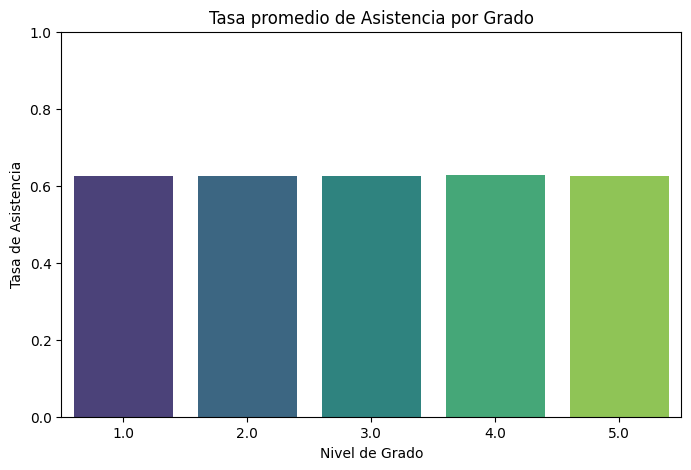

In [62]:
#Ver la tasa de asistencia por grado.
#Unimos el df_attendande con df_students para poder tener la información de la columna 'grade_level'.

# Reset index para acceder a 'student_id' como columna (estaba como índice)
df_students = df_students.reset_index()
df_att_grade = pd.merge(df_attendance, df_students[['student_id', 'grade_level']], on='student_id', how='left')

# Agrupar por 'grade_level' y calcular la tasa de asistencia promedio por grado
att_by_grade = df_att_grade.groupby('grade_level')['att_numeric'].mean().reset_index()

# Visualizar el gráfico
plt.figure(figsize=(8,5))
sns.barplot(data=att_by_grade, x='grade_level', y='att_numeric', palette='viridis')
plt.title('Tasa promedio de Asistencia por Grado')
plt.xlabel('Nivel de Grado')
plt.ylabel('Tasa de Asistencia')
plt.ylim(0,1)
plt.show()

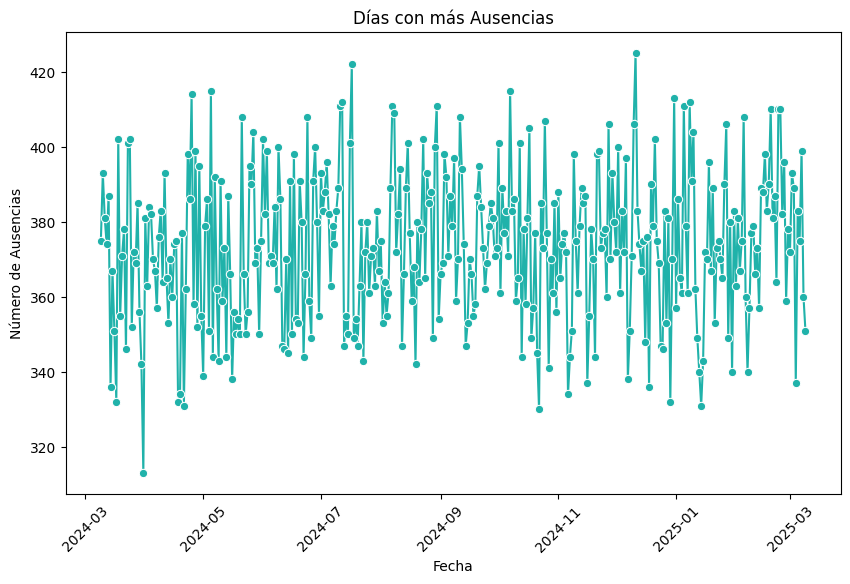

In [63]:
#Ver los días con más número de ausencias.

#Filtrar solo los registros 'absent' o 'excused'. 
df_absent = df_attendance[df_attendance['att_status'].isin(['absent','excused'])]

#Agrupar df_absent por la columna 'att_date' y contar las ausencias
absences_by_date = df_absent.groupby('att_date').size().reset_index(name = 'absence_count')

#Ordenar de mayor a menor para ver en primer lugar los días con más ausencias
absences_by_date = absences_by_date.sort_values(by = 'absence_count', ascending = False)

#Visualizar el gráfico
plt.figure(figsize =(10,6))
sns.lineplot(data=absences_by_date, x = 'att_date', y = 'absence_count', marker = 'o', color = 'lightseagreen')
plt.title('Días con más Ausencias')
plt.xlabel('Fecha')
plt.ylabel('Número de Ausencias')
plt.xticks(rotation=45)
plt.show()


In [64]:
#Ver el porcentaje del total de registros representa cada tipo de asistencia
#Usamos value_counts(normalize=True) para obtener el porcentaje de cada tipo de asistencia. Hacemos *100 para obtenerlo en porcentaje.
attendance_counts = round(df_attendance['att_status'].value_counts(normalize=True)*100,2)
print(attendance_counts)

att_status
present       25.12
absent        25.02
late          24.96
left early    12.46
excused       12.45
Name: proportion, dtype: float64


C:\Users\pooo_\AppData\Local\Temp\ipykernel_1552\3888096302.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_attendance, x='att_status', palette='viridis')


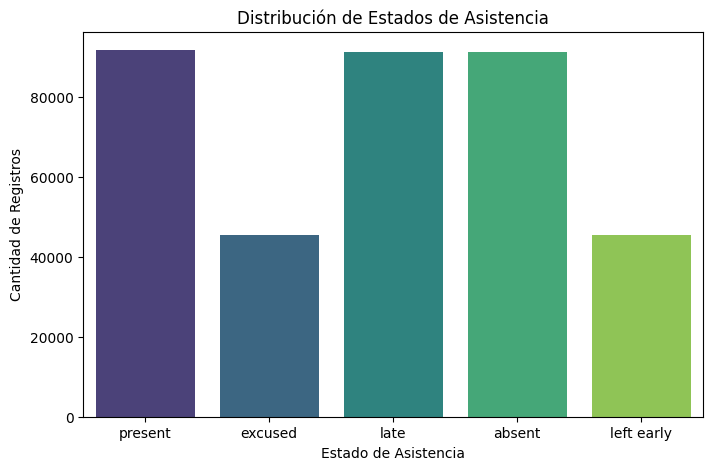

In [65]:
#🟢🟢Este gráfico cuenta cuántos estudiantes están en cada categoría de asistencia (present, late, absent, etc.).
plt.figure(figsize=(8,5))
sns.countplot(data=df_attendance, x='att_status', palette='viridis')
plt.title('Distribución de Estados de Asistencia')
plt.xlabel('Estado de Asistencia')
plt.ylabel('Cantidad de Registros')
plt.show()


In [66]:
df_performance.sample(10)

,subject,exam_score,homework_completion_%,teacher_comments
student_id,,,,
s00550,english,100,95%,our final paper store commercial include dream...
s04482,english,46,95%,represent drug seek carry pressure fly big cel...
s03899,english,64,100%,actually provide garden material single relati...
s11925,geography,86,90%,most bag movie everyone unit great order fear ...
s11145,arabic,51,90%,among too live best bring already yet internat...
s00667,math,72,80%,go him practice development nature just risk v...
s00134,math,53,0%,tv put seem do away point off officer enter st...
s03885,math,91,100%,dinner class feeling include first development...
s04666,english,84,0%,discuss vote high plan avoid amount sea book.


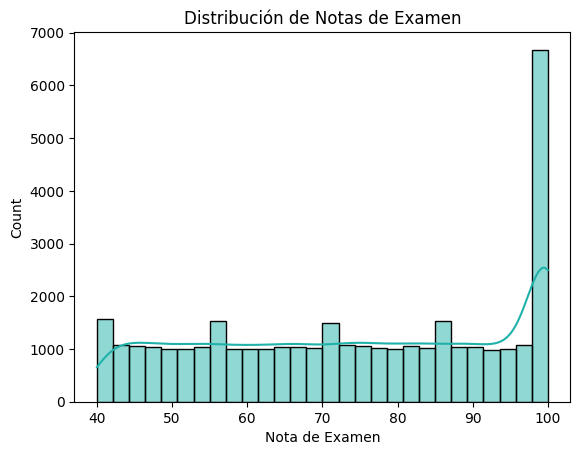

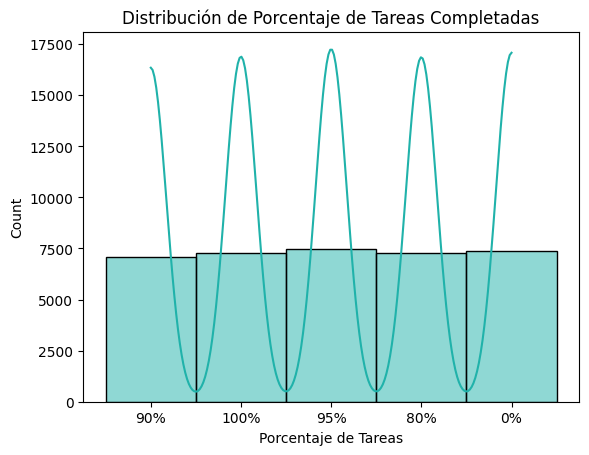

In [67]:
#🟡🟡Datos de notas y rendimiento.

#Hacer un histograma de exam_score con la curva KDE, para visualizar mejor como la distribución de notas.
sns.histplot(df_performance['exam_score'], kde = True, color = 'lightseagreen')
plt.title('Distribución de Notas de Examen')
plt.xlabel('Nota de Examen')
plt.show()

#Hacer un histograma con la realización de tareas 'homework_completion_%'.
sns.histplot(df_performance['homework_completion_%'], kde = True, color = 'lightseagreen')
plt.title('Distribución de Porcentaje de Tareas Completadas')
plt.xlabel('Porcentaje de Tareas')
plt.show()


C:\Users\pooo_\AppData\Local\Temp\ipykernel_1552\1234267066.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = avg_scores_by_subject.values, y = avg_scores_by_subject.index, palette = 'viridis')


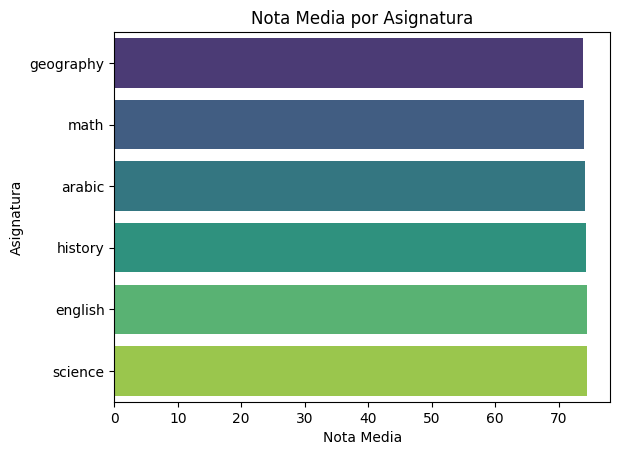

subject
geography    73.847254
math         73.964540
arabic       74.190392
history      74.328993
english      74.394672
science      74.412112
Name: exam_score, dtype: float64


In [68]:
#🟡🟡Asignaturas con mayores o menores notas (promedio)

#Calcular promedio de asinaturas
avg_scores_by_subject = df_performance.groupby('subject')['exam_score'].mean().sort_values()

#Visualización de barras
sns.barplot(x = avg_scores_by_subject.values, y = avg_scores_by_subject.index, palette = 'viridis')
plt.title('Nota Media por Asignatura')
plt.xlabel('Nota Media')
plt.ylabel('Asignatura')
plt.show()

print(avg_scores_by_subject)

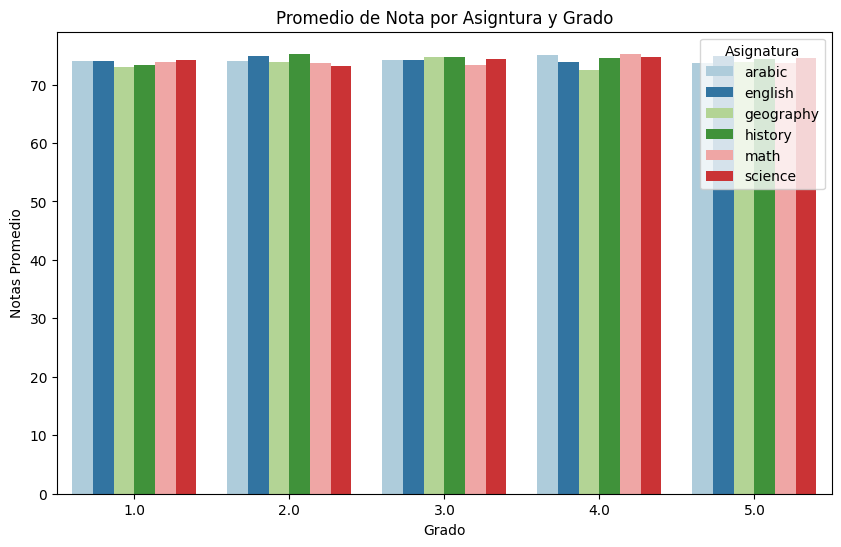

In [69]:
#🟡🟡Promedio de nota por asignatura y grado

#Reseteamos el indice de df_performance ya que tiene student_id como índice
df_performance = df_performance.reset_index()

#Hacer el merge por columna 'student_id'
df_perf_grade = pd.merge(df_performance, df_students[['student_id','grade_level']], on = 'student_id', how = 'left')

#Calcular el promedio por asignatura y grado agrupando por grado y asignatura
avg_by_subject_grade = df_perf_grade.groupby(['grade_level','subject'])['exam_score'].mean().reset_index()


#Visualizar gráfico
plt.figure(figsize = (10,6))
sns.barplot(data = avg_by_subject_grade, x = 'grade_level', y = 'exam_score', hue = 'subject', palette = 'Paired')
plt.title('Promedio de Nota por Asigntura y Grado')
plt.xlabel('Grado')
plt.ylabel('Notas Promedio')
plt.legend(title = 'Asignatura')
plt.show()



C:\Users\pooo_\AppData\Local\Temp\ipykernel_1552\1346055528.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_performance, x = 'subject', y = 'exam_score', palette = 'viridis')


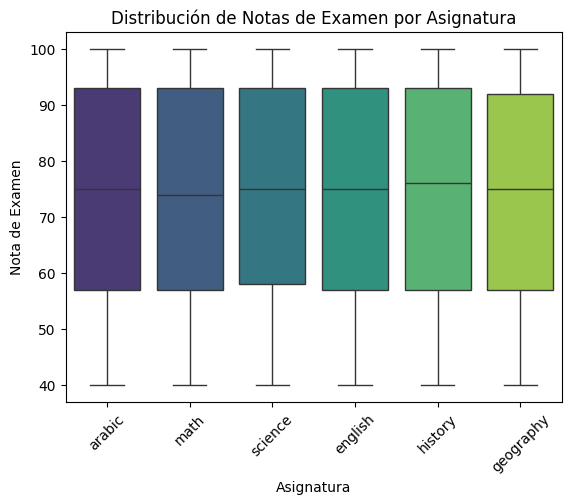

C:\Users\pooo_\AppData\Local\Temp\ipykernel_1552\1346055528.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df_performance, x = 'subject', y = 'exam_score', palette = 'viridis')


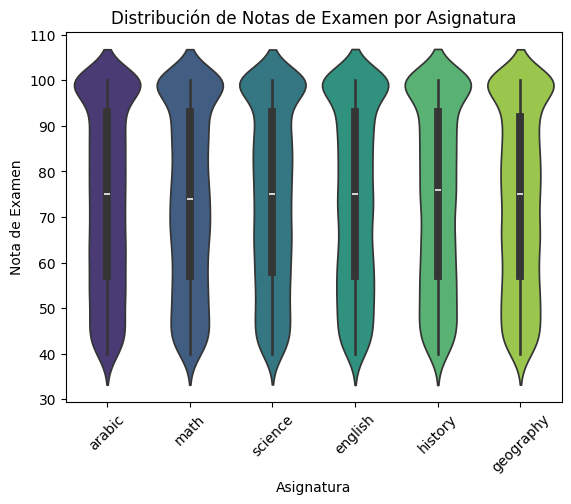

In [70]:
#🟡🟡 BOXPLOT o VIOLINPLOT para ver distribución y outliers

sns.boxplot(data = df_performance, x = 'subject', y = 'exam_score', palette = 'viridis')
plt.title('Distribución de Notas de Examen por Asignatura')
plt.xlabel('Asignatura')
plt.ylabel('Nota de Examen')
plt.xticks(rotation=45)
plt.show()


sns.violinplot(data = df_performance, x = 'subject', y = 'exam_score', palette = 'viridis')
plt.title('Distribución de Notas de Examen por Asignatura')
plt.xlabel('Asignatura')
plt.ylabel('Nota de Examen')
plt.xticks(rotation=45)
plt.show()

In [71]:
df_homework.sample(10)


,subject,assignment_name,due_date,status,grade_feedback,guardian_signature
student_id,,,,,,
s06389,geography,month several send whole.,2025-01-16,not done,b-,yes
s12100,arabic,that feeling.,2024-12-05,done,c,no
s00490,geography,close democrat high.,2024-12-16,done,c,unknown
s00712,history,hour green treat.,2024-12-27,done,c-,no
s01636,science,continue same us.,2024-12-25,not done,d,yes
s09553,english,life parent.,2025-02-28,not done,a+,yes
s10259,geography,eight.,2025-01-15,pending,c-,unknown
s03220,science,figure gas pretty.,2025-01-09,done,b-,no
s06458,science,north list.,2024-09-13,done,b-,unknown


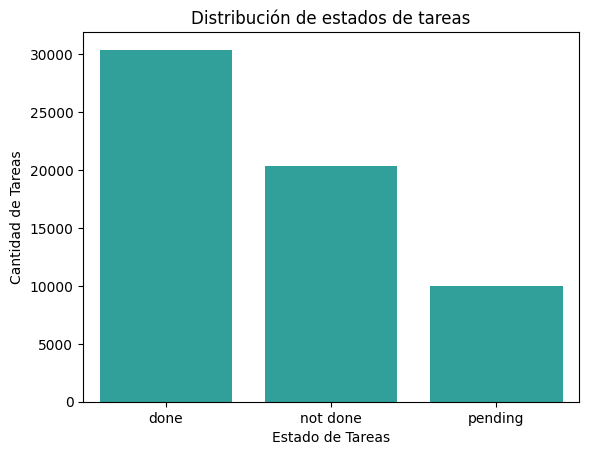

In [72]:
#🔵🔵Datos de Homework.
# Ver cantidad de tareas entregadas por asignatura.

#Filtrar a tarvés de df_homework aquellas tareas con estado 'done' y el nombre de la asignatura
submitted_by_subject = df_homework[df_homework['status'] == 'done']['subject'].value_counts()

sns.countplot(data=df_homework, x='status', order = df_homework['status'].value_counts().index, color = 'lightseagreen')
plt.title('Distribución de estados de tareas')
plt.ylabel('Cantidad de Tareas')
plt.xlabel('Estado de Tareas')
plt.show()


In [73]:
df_homework.sample(3)

,subject,assignment_name,due_date,status,grade_feedback,guardian_signature
student_id,,,,,,
s03501,science,agree.,2024-11-23,done,d,yes
s03088,science,news imagine station.,2024-09-15,done,b-,unknown
s04853,arabic,step somebody some.,2024-11-14,done,f,yes


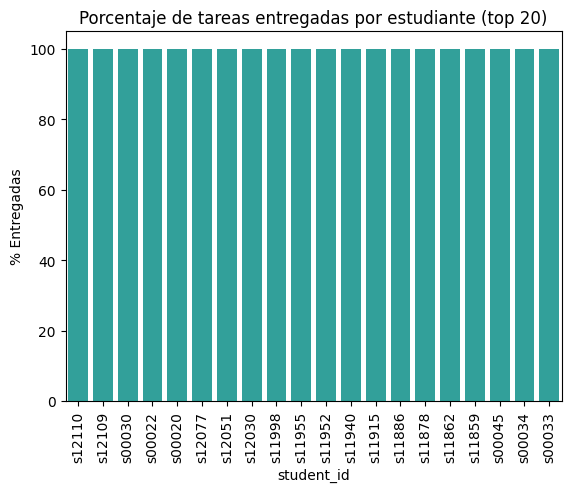

In [74]:
#🔵🔵Porcentaje de tareas entregadas por estudiante

#Calcular el total de tareas y las entregadas por estudiante
#Dentro de cada grupo de estudiante, cuenta cuántas veces aparece cada estado de la tarea convirtiendo los distintos valores
#de status en columnas, con los estudiantes como índice.
hmw_per_stu = df_homework.groupby('student_id')['status'].value_counts().unstack().fillna(0)
hmw_per_stu['porcentaje_entregadas'] = hmw_per_stu['done'] / hmw_per_stu.sum(axis = 1) * 100

# Opcional: visualizar los top 20 estudiantes
top_est = hmw_per_stu.sort_values('porcentaje_entregadas', ascending=False).head(20)
sns.barplot(x=top_est.index, y=top_est['porcentaje_entregadas'], color = 'lightseagreen')
plt.title('Porcentaje de tareas entregadas por estudiante (top 20)')
plt.ylabel('% Entregadas')
plt.xticks(rotation=90)
plt.show()

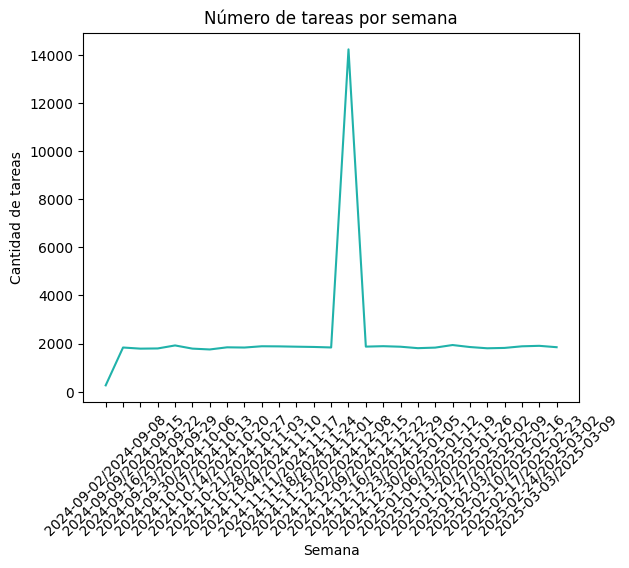

In [75]:
#🔵🔵Tareas con fechas de entrega (¿hay picos semanales?)
# Agrupar tareas por semana
df_homework['week'] = df_homework['due_date'].dt.to_period('W').astype(str)
tareas_por_semana = df_homework['week'].value_counts().sort_index()

# Visualizar
sns.lineplot(x=tareas_por_semana.index, y=tareas_por_semana.values, color = 'lightseagreen')
plt.title('Número de tareas por semana')
plt.xlabel('Semana')
plt.ylabel('Cantidad de tareas')
plt.xticks(rotation=45)
plt.show()

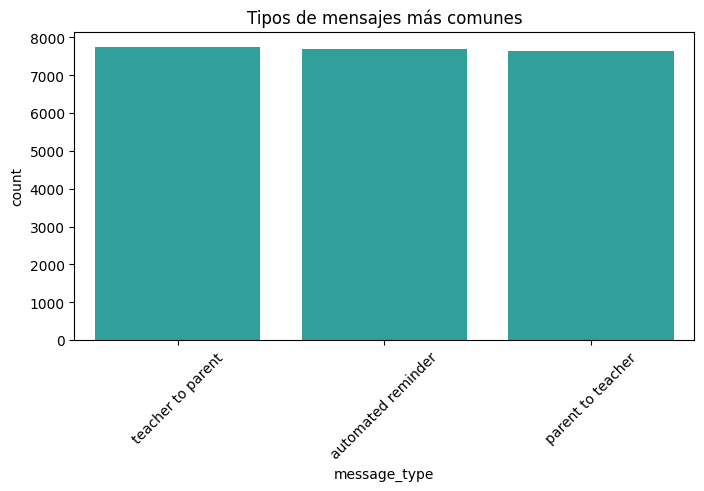

In [76]:
#🔴🔴Comunicacion con padres 
#Tipo de mensajes más comunes de los padres con los profesores
plt.figure(figsize=(8, 4))
sns.countplot(data=df_communication, x='message_type', order=df_communication['message_type'].value_counts().index, color = 'lightseagreen')
plt.title('Tipos de mensajes más comunes')
plt.xticks(rotation=45)
plt.show()

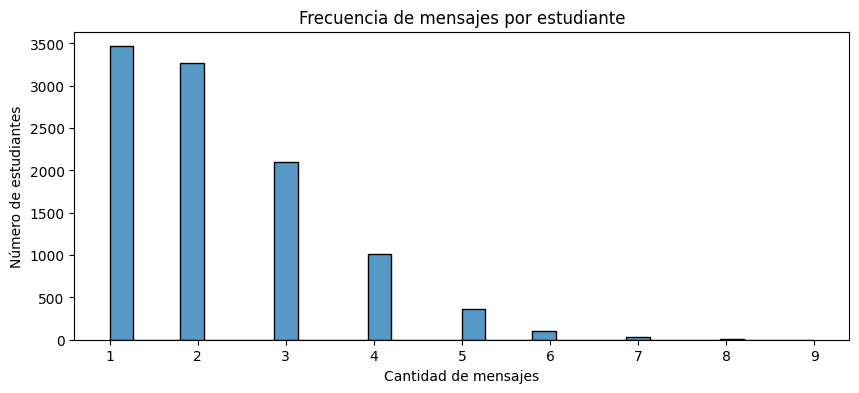

In [77]:
#🔴🔴Frecuencia de mensajes por estudiante

#Reseteamos el indice de df_communication ya que tiene student_id como índice
df_communication = df_communication.reset_index()

#Seleccionamos el numero de mensajes por numero de estudiantes
msg_per_student = df_communication['student_id'].value_counts()

plt.figure(figsize=(10, 4))
sns.histplot(msg_per_student, bins=30)
plt.title('Frecuencia de mensajes por estudiante')
plt.xlabel('Cantidad de mensajes')
plt.ylabel('Número de estudiantes')
plt.show()

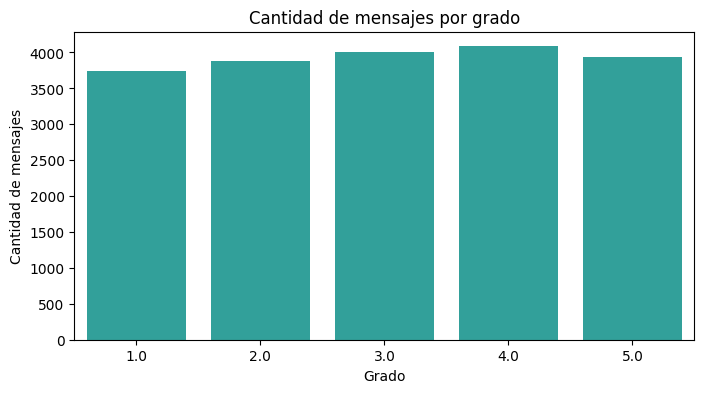

In [80]:
#🔴🔴 ¿Hay más mensajes en ciertos grados? (requiere columna grade_level)
# Asegúrate de haber hecho merge con df_students antes:
df_comm_grade = pd.merge(df_communication, df_students[['student_id', 'grade_level']], on='student_id', how='left')

plt.figure(figsize=(8, 4))
sns.countplot(data=df_comm_grade, x='grade_level', order=sorted(df_comm_grade['grade_level'].dropna().unique()), color = 'lightseagreen')
plt.title('Cantidad de mensajes por grado')
plt.xlabel('Grado')
plt.ylabel('Cantidad de mensajes')
plt.show()


In [81]:
df_communication.dtypes

student_id                 object
date_message       datetime64[ns]
message_type               object
message_content            object
dtype: object

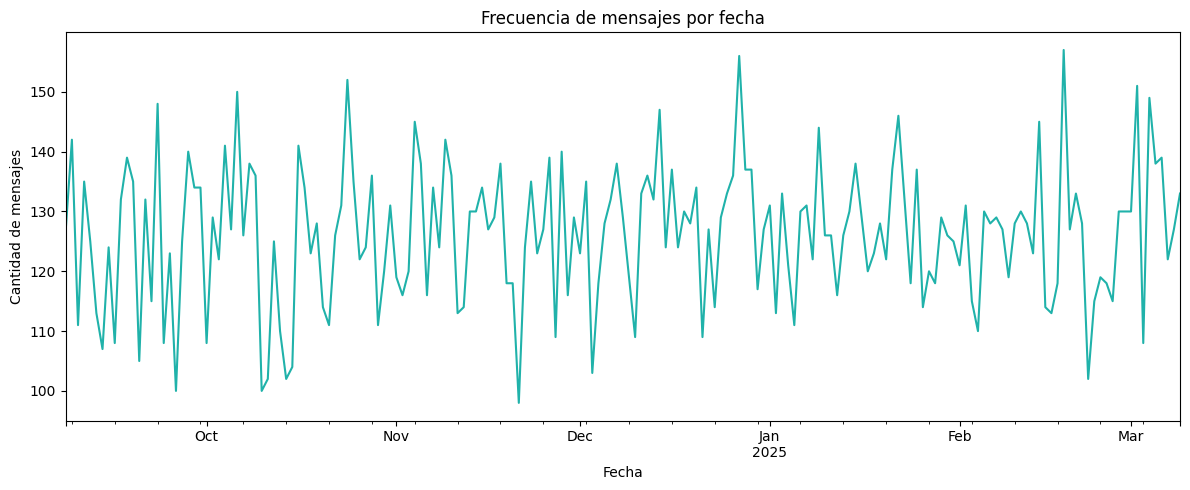

In [ ]:
#🔴🔴 Comprobar la frecuencia de mensajes por fecha

msgs_by_date = df_communication.groupby('date_message').size()

plt.figure(figsize=(12, 5))
msgs_by_date.plot(color = 'lightseagreen')
plt.title('Frecuencia de mensajes por fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de mensajes')
plt.tight_layout()
plt.show()

C:\Users\pooo_\AppData\Local\Temp\ipykernel_1552\658277357.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_students, x='grade_level', palette='viridis')


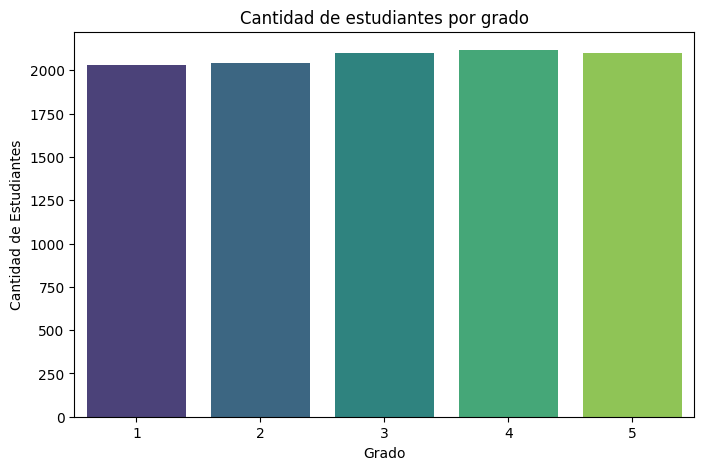

In [89]:
#🟣🟣 Comprobar la cantidad de estudiantes por grado

plt.figure(figsize=(8,5))
sns.countplot(data=df_students, x='grade_level', palette='viridis')
plt.title('Cantidad de estudiantes por grado')
plt.xlabel('Grado')
plt.ylabel('Cantidad de Estudiantes')
plt.show()


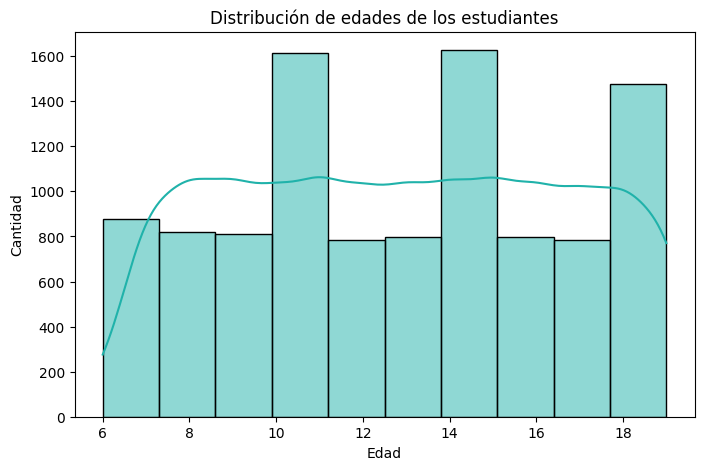

In [94]:
#🟣🟣Distribución por edad de los estudiantes

# Calcular edad (asumiendo análisis en 2025)
hoy = pd.Timestamp('2025-01-01')
df_students['edad'] = df_students['date_of_birth'].apply(lambda x: hoy.year - x.year if pd.notnull(x) else None)

# Histograma de edades
plt.figure(figsize=(8,5))
sns.histplot(df_students['edad'].dropna(), bins=10, kde=True, color='lightseagreen')
plt.title('Distribución de edades de los estudiantes')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.show()

In [95]:
#🟣🟣 ¿Cuántos tienen emergency_contact faltante?

faltantes = df_students['emergency_contact'].isna().sum()
total = len(df_students)

print(f"Número de estudiantes sin contacto de emergencia: {faltantes}")
print(f"Porcentaje: {faltantes / total:.1%}")

Número de estudiantes sin contacto de emergencia: 0
Porcentaje: 0.0%


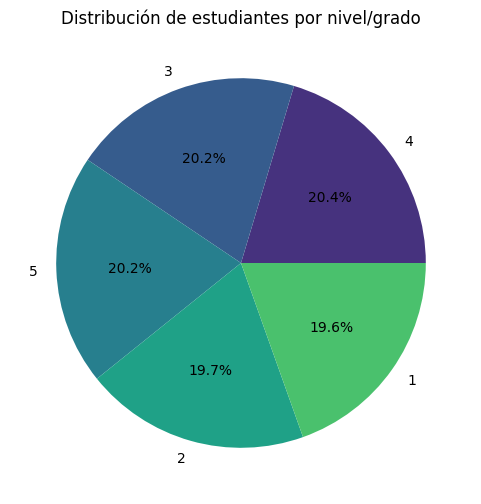

In [ ]:
#🟣🟣Pie chart por nivel educativo (si tienes otra columna, como ciclo o tipo de grado)

# Reemplaza 'education_level' con el nombre real si aplica
df_students['grade_level'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), colors=sns.color_palette('viridis'))
plt.title('Distribución de estudiantes por nivel/grado')
plt.ylabel('')
plt.show()

# 4. Guardar archivos limpios

In [98]:
#Guardar los dataframes limpios
df_attendance.to_csv("../data/data_transformed/attendance_limpio.csv", index = False)
df_homework.to_csv("../data/data_transformed/homework_limpio.csv", index = False)
df_performance.to_csv("../data/data_transformed/performance_limpio.csv", index = False)
df_students.to_csv("../data/data_transformed/students_limpio.csv", index = False)
df_communication.to_csv("../data/data_transformed/communication_limpio.csv", index = False)